## Preprocess

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso


import warnings
warnings.filterwarnings("ignore")

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:

data_path = '../data/ndtv_data_final.csv'
df = pd.read_csv(data_path, index_col=0)
df.head()


,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [7]:
print(df.shape)

(1359, 21)


Bộ dữ liệu gồm 1359 mẫu, 21 trường.
Mỗi hàng là một mẫu.

In [8]:
# Displaying column names
df.columns

Index(['Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')



* `Name` và `Model` Tên và loại của máy. Nó không cần thiết cho mô hình.

* `Brand` Tên công ty sản xuất ra điện thoại. Là cột kiểu phân loại.

* `Battery capacity (mAh)` Dung lượng pin. Kiểu số.

* `Screen size (inches)`, `Resolution x`, and `Resolution y` Kích thước màn hình. Kiểu số.

* `Touchscreen` Kiểu phân loại, **Yes** nếu có màn hình cảm ứng, **No** nếu không có.

* `Processor` Số nhân xử lý (của vi xử lý) Kiểu số.

* `RAM (MB)` Bộ nhớ trong. Kiểu số.

* `Internal storage (GB))` Bộ nhớ lưu trữ. Kiểu số

* `Rear camera` and `Front camera` Độ phân giải camera sau và trước. Dạng số

* `Operating system` Hệ điều hành. Dạng phân loại.

* `Wi-Fi`, `Bluetooth`, `GPS`, `Number of SIMs`, `3G`, `4G/ LTE` Wifi, Bluetooth, GPS (Định  vị), Đa sim, 3G, 4G. **Yes** là có hỗ trợ và **No** là không hỗ trợ.

In [9]:
# Loại bỏ cột không cần thiết.
df = df.drop(['Name', 'Model'], axis=1)
df.shape

(1359, 19)

In [10]:
# Đổi đơn vị
# Đơn vị Ram đổi thành GB, đơn vị tính giá tiền từ INR (Rupee ấn độ) thành USD (Đô la Mỹ)

# RAM in GB
df['RAM'] = df['RAM (MB)'] / 1000
df.drop('RAM (MB)', axis=1, inplace=True)

# Prices in USD (1 INR bằng 0.011 USD tại thời điểm 7 Nov 2025)
df['Price'] = df['Price'] * 0.011

In [11]:
# Kiểm tra giá trị thiếu
df.isna().sum()

Brand                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
RAM                       0
dtype: int64

Không có giá trị thiếu nào.

In [12]:
df.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price,RAM
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,30.654864,12.070199,7.037969,1.833701,126.124082,2.488778
std,873.514133,0.671357,270.707271,557.780120,2.196562,36.950241,8.948337,6.295448,0.374457,152.432468,1.664440
min,1010.000000,2.400000,240.000000,320.000000,1.000000,0.064000,0.000000,0.000000,1.000000,5.434000,0.064000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,8.000000,8.000000,2.000000,2.000000,52.398500,1.000000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,16.000000,12.200000,5.000000,2.000000,76.989000,2.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,32.000000,13.000000,8.000000,2.000000,131.989000,3.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,512.000000,108.000000,48.000000,3.000000,1924.890000,12.000000


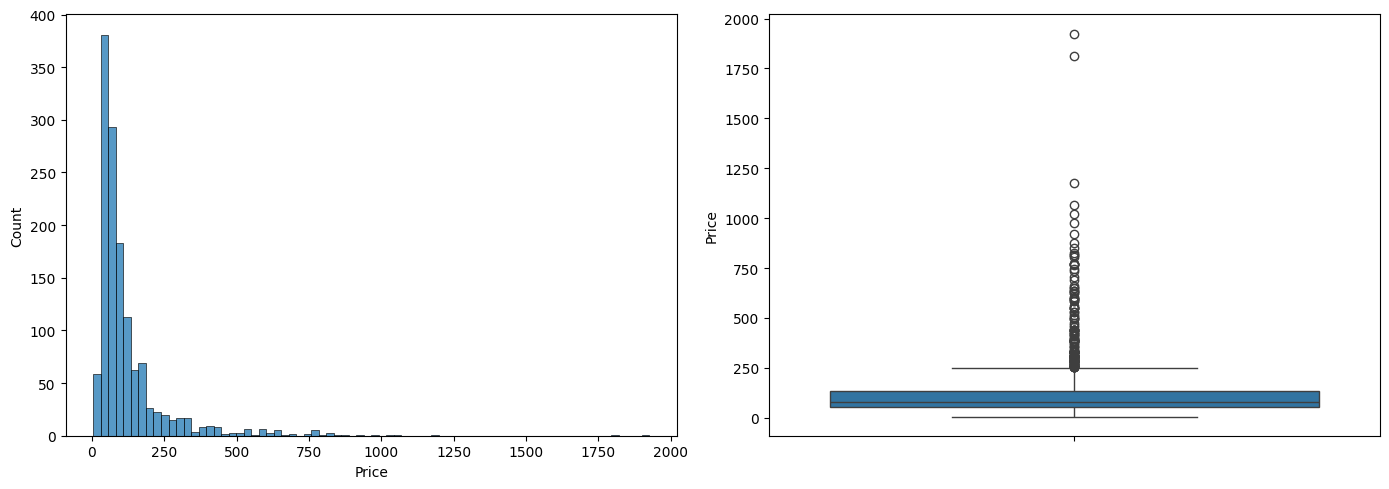

In [13]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Price'])
plt.subplot(122)
sns.boxplot(df['Price'])

plt.tight_layout()
plt.show()

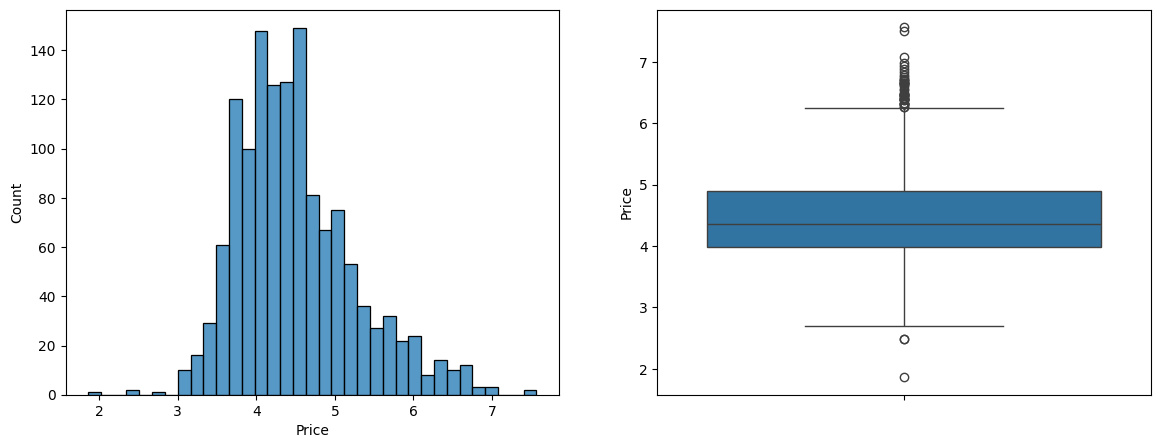

In [14]:
# Applying log transformation on Price to reduce outliers effect

plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(np.log1p(df['Price']))

plt.subplot(122)
sns.boxplot(np.log1p(df['Price']))

plt.show()

In [15]:
# Adding log of the Price column to the dataset.
df['Price_log'] = np.log1p(df['Price'])

# Calculating Z-scores
z_scores = np.abs(stats.zscore(df['Price_log']))

# Filtering out rows with Z-scores >= 3
df = df[(z_scores < 3)]

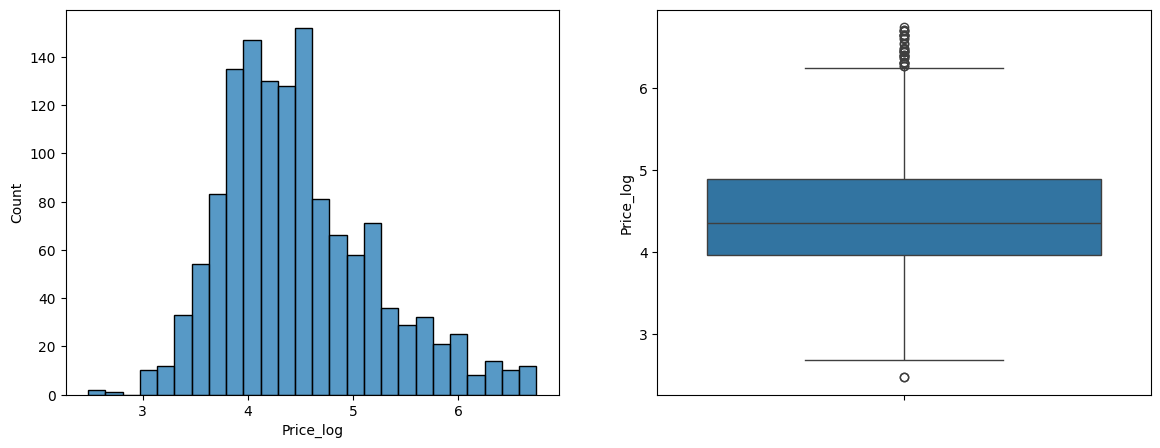

In [16]:
# Taking a look after filtering out some rows

plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Price_log'])

plt.subplot(122)
sns.boxplot(df['Price_log'])

plt.show()

In [17]:
# Changing column names.

df.rename(columns={'Battery capacity (mAh)' : 'Battery capacity',
                  'Internal storage (GB)': 'Storage',
                  'Operating system': 'OS',
                  'Wi-Fi': 'Wifi',
                  'Number of SIMs': 'SIM',
                  '4G/ LTE': '4G',
                  'Screen size (inches)': 'Screen size'}, inplace=True)

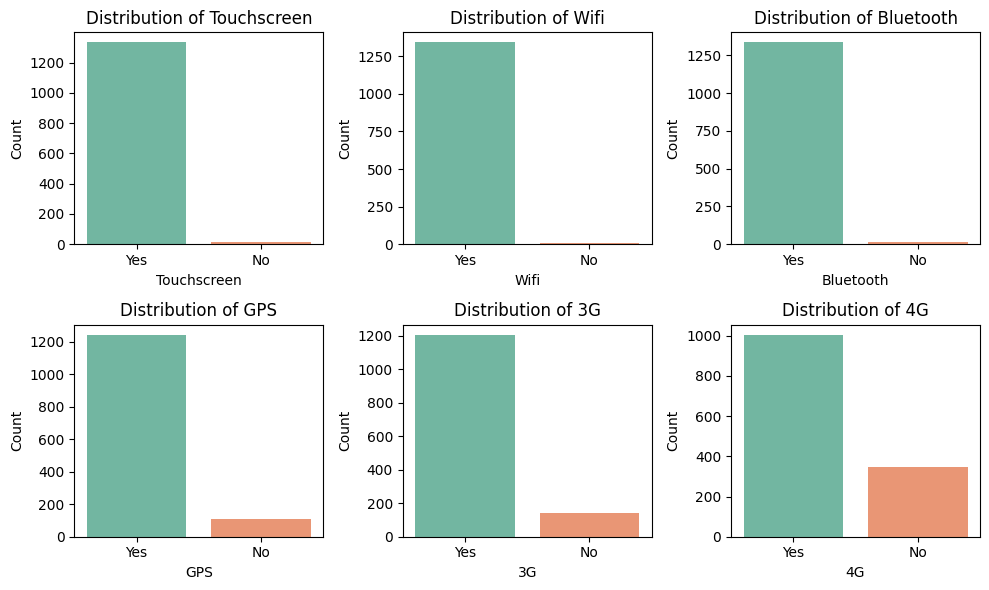

In [18]:
# Plotting a list of categorical columns
columns = ['Touchscreen', 'Wifi', 'Bluetooth', 'GPS', '3G', '4G']

plt.figure(figsize=(10, 6))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
# Dropping the list of categorical columns except 4G

df = df.drop(columns=[col for col in columns if col not in '4G'], axis=1)

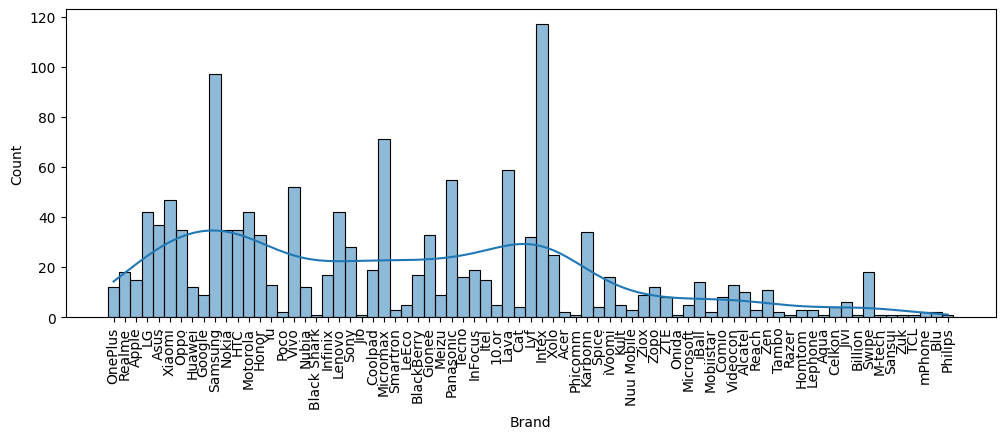

In [20]:
# Displaying Brand distributions

plt.figure(figsize=(12,4))
sns.histplot(df['Brand'], kde=True)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Đưa các brand có dưới 10 sản phẩm vào phân loại Other.

threshold = 10
brand_counts = df['Brand'].value_counts()
rare_brands = brand_counts[brand_counts <= threshold].index
df['Brand'] = df['Brand'].apply(lambda x: 'Other' if x in rare_brands else x)

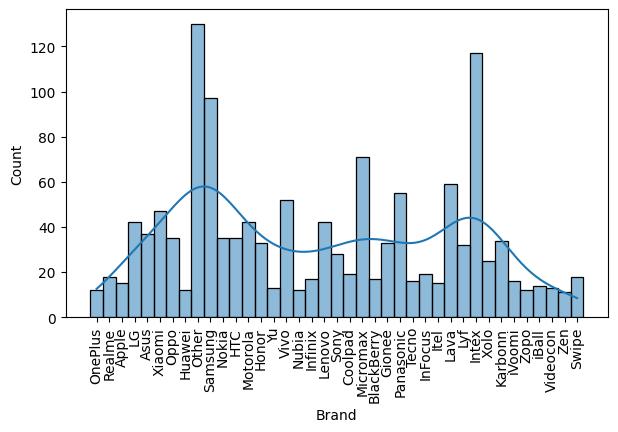

In [22]:
# Vẽ đồ thị Brand sau khi đổi.

plt.figure(figsize=(7,4))
sns.histplot(df['Brand'], kde=True)
plt.xticks(rotation=90)
plt.show()

In [23]:
df['SIM'].value_counts()

SIM
2    1124
1     225
3       1
Name: count, dtype: int64

Chỉ có một thiết bị hỗ trợ 3 SIM. Nó không đủ để phân biệt về giá đối với thiết bị có 3 sim. Nó không thuộc phạm vi của project này.

In [24]:
df[df['SIM'] == 3]

,Brand,Battery capacity,Screen size,Resolution x,Resolution y,Processor,Storage,Rear camera,Front camera,OS,SIM,4G,Price,RAM,Price_log
508,Coolpad,3050,5.5,720,1080,4,16.0,8.0,8.0,Android,3,Yes,50.49,2.0,3.941388


In [25]:
# loại bỏ thiết bị 3 sim

df = df.drop(index=508)

df = df.reset_index(drop=True)

In [26]:
# Kiểm tra OS

OS_freq = (df['OS']).value_counts()
OS_freq

OS
Android       1292
Windows         18
iOS             15
Cyanogen        10
BlackBerry      10
Tizen            3
Sailfish         1
Name: count, dtype: int64

In [27]:
def simplify_os(os):
    if os == 'iOS':
        return 'iOS'
    elif os == 'Android':
        return 'Android'
    else:
        return 'Other'

df['OSs'] = df['OS'].apply(simplify_os)


In [28]:
# Loại bỏ trường OS

# df = df.drop(columns=['OS'], axis=1)

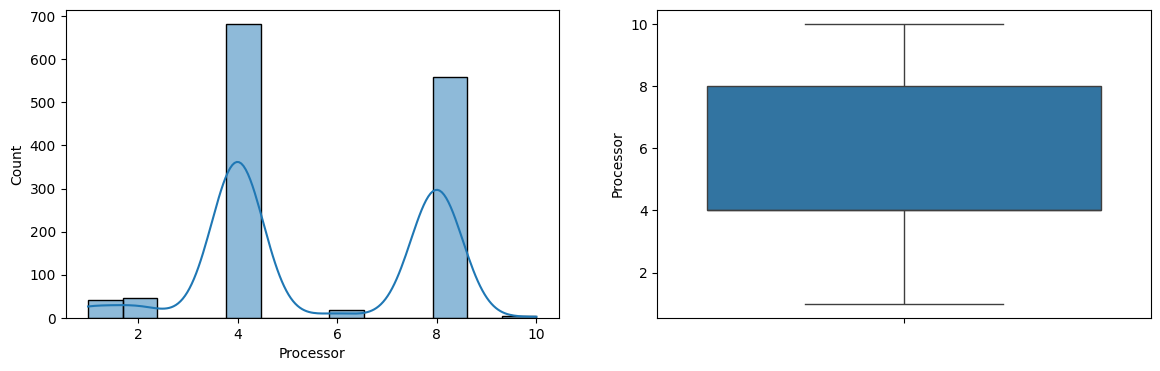

In [29]:
# Displaying `Processor` distribution

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Processor'], kde=True)
plt.subplot(122)
sns.boxplot(df['Processor'])
plt.show()

In [30]:
# Converting Processor column to a categorical column.

def categorize_processor(x):
    if x == 1 or x == 2:
        return '1_2'
    elif x==4 or x == 6:
        return '4_6'
    elif x > 6:
        return '8_10'

df['CPU'] = df['Processor'].apply(categorize_processor)

In [31]:
df.dtypes

Brand                object
Battery capacity      int64
Screen size         float64
Resolution x          int64
Resolution y          int64
Processor             int64
Storage             float64
Rear camera         float64
Front camera        float64
OS                   object
SIM                   int64
4G                   object
Price               float64
RAM                 float64
Price_log           float64
OSs                  object
CPU                  object
dtype: object

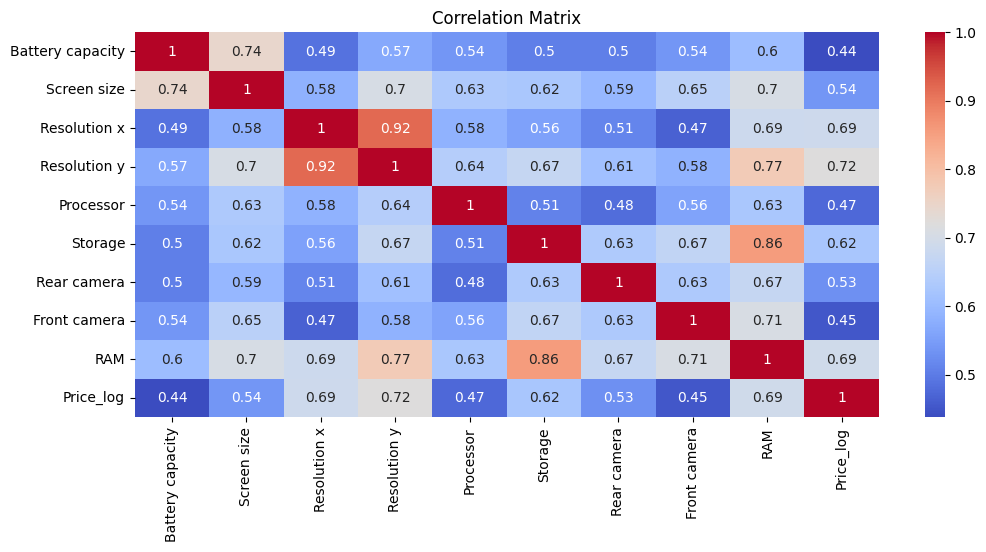

In [32]:
# Ma trận tương  quan

continuous_variables = ['Battery capacity', 'Screen size', 'Resolution x', 'Resolution y', 'Processor', 'Storage', 'Rear camera', 'Front camera','RAM', 'Price_log']

corr_df = df[continuous_variables]

corr_matrix = corr_df[continuous_variables].corr()

plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:

# Converting categorical data into the proper format for modeling.

df_encoded = pd.get_dummies(df, drop_first=True, columns=['SIM', '4G', 'CPU', 'OSs'], dtype='int32')

In [34]:
df_encoded.drop(['Brand', 'Price', 'Processor', 'OS'], axis=1, inplace=True)

Chưa biết cách xử lý trường Brand.
Bỏ trường Price, chỉ giữ Price_log.

In [35]:
df_encoded.columns

Index(['Battery capacity', 'Screen size', 'Resolution x', 'Resolution y',
       'Storage', 'Rear camera', 'Front camera', 'RAM', 'Price_log', 'SIM_2',
       '4G_Yes', 'CPU_4_6', 'CPU_8_10', 'OSs_Other', 'OSs_iOS'],
      dtype='object')

In [36]:
df_encoded.to_csv('../data/preprocessed_data.csv', index=False)